In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

'2.2.0'

In [6]:
FILE_PATH = "../"
path_to_kl_div_sum = "../ShallowAE/Sparse/KL_div_sum/"
data = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=True)
x_train, y_train, x_test, y_test, x_small, y_small = data
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [ ]:
for j in range(len(x_test)):
    i = 0
    if (j % 100 == 0):
        print(j)
    while (i < len(x_train)) and (not np.all(x_test[j,:,:,0]==x_train[i,:,:,0])):
        i=i+1
    if i < len(x_train):
        print('Found ! ! !')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600


In [63]:
len(x_train)

60000

In [7]:
pd.read_csv("../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01results")

,Unnamed: 0,sparsity_objective,sparsity_weight,test_error,test_kl_loss,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_kl_loss,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,0.01,0.01,0.030503,0.005356,0.075174,0.051366,0.736750,0.030408,0.005413,0.075703,0.052158,0.737789
1,1,0.05,0.01,0.017590,0.001091,0.160881,0.168944,0.568108,0.017450,0.001093,0.162046,0.170353,0.568484
2,2,0.10,0.01,0.013367,0.000863,0.510807,0.541470,0.418449,0.013270,0.000834,0.512714,0.543158,0.419202
3,3,0.20,0.01,0.010380,0.000687,2.167435,2.223941,0.231117,0.010306,0.000667,2.169933,2.225454,0.231796
4,4,0.01,0.10,0.044085,0.004102,0.064997,0.013952,0.590963,0.044179,0.004092,0.065272,0.014126,0.591690
5,5,0.05,0.10,0.019681,0.003821,0.183375,0.191730,0.410924,0.019557,0.003789,0.184433,0.193049,0.411717
6,6,0.10,0.10,0.014663,0.004441,0.722625,0.759501,0.270147,0.014582,0.004310,0.724593,0.761467,0.270905
7,7,0.20,0.10,0.011739,0.008623,2.856205,2.896347,0.160568,0.011658,0.008473,2.859318,2.899309,0.161126
8,8,0.01,0.50,0.053131,0.005185,0.075383,0.010889,0.351383,0.053311,0.005349,0.075752,0.011009,0.351192
9,9,0.05,0.50,0.025286,0.018647,0.208720,0.225577,0.250164,0.025203,0.018607,0.210162,0.227180,0.251420


In [8]:
sparsity_objectives = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_sparsityObjectives_test_sparsity_hyperparameters.npy')
sparsity_weights = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_sparsityWeights_test_sparsity_hyperparameters.npy')
test_mse = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_errors_test_sparsity_hyperparameters.npy')
train_mse = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_errors_test_sparsity_hyperparameters.npy')
test_kl_loss = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_kl_loss_test_sparsity_hyperparameters.npy')
train_kl_loss = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_kl_loss_test_sparsity_hyperparameters.npy')
test_max_approx_to_Original = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_max_approx_error_toOriginal_dilationtest_sparsity_hyperparameters.npy')
train_max_approx_to_Original = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_max_approx_error_toOriginal_dilatationtest_sparsity_hyperparameters.npy')
test_max_approx_to_Rec = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_max_approx_error_toRec_dilationtest_sparsity_hyperparameters.npy')
train_max_approx_to_Rec = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_max_approx_error_toRec_dilatationtest_sparsity_hyperparameters.npy')
test_sparsity = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_sparsity_test_sparsity_hyperparameters.npy')
train_sparsity = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_sparsity_test_sparsity_hyperparameters.npy')

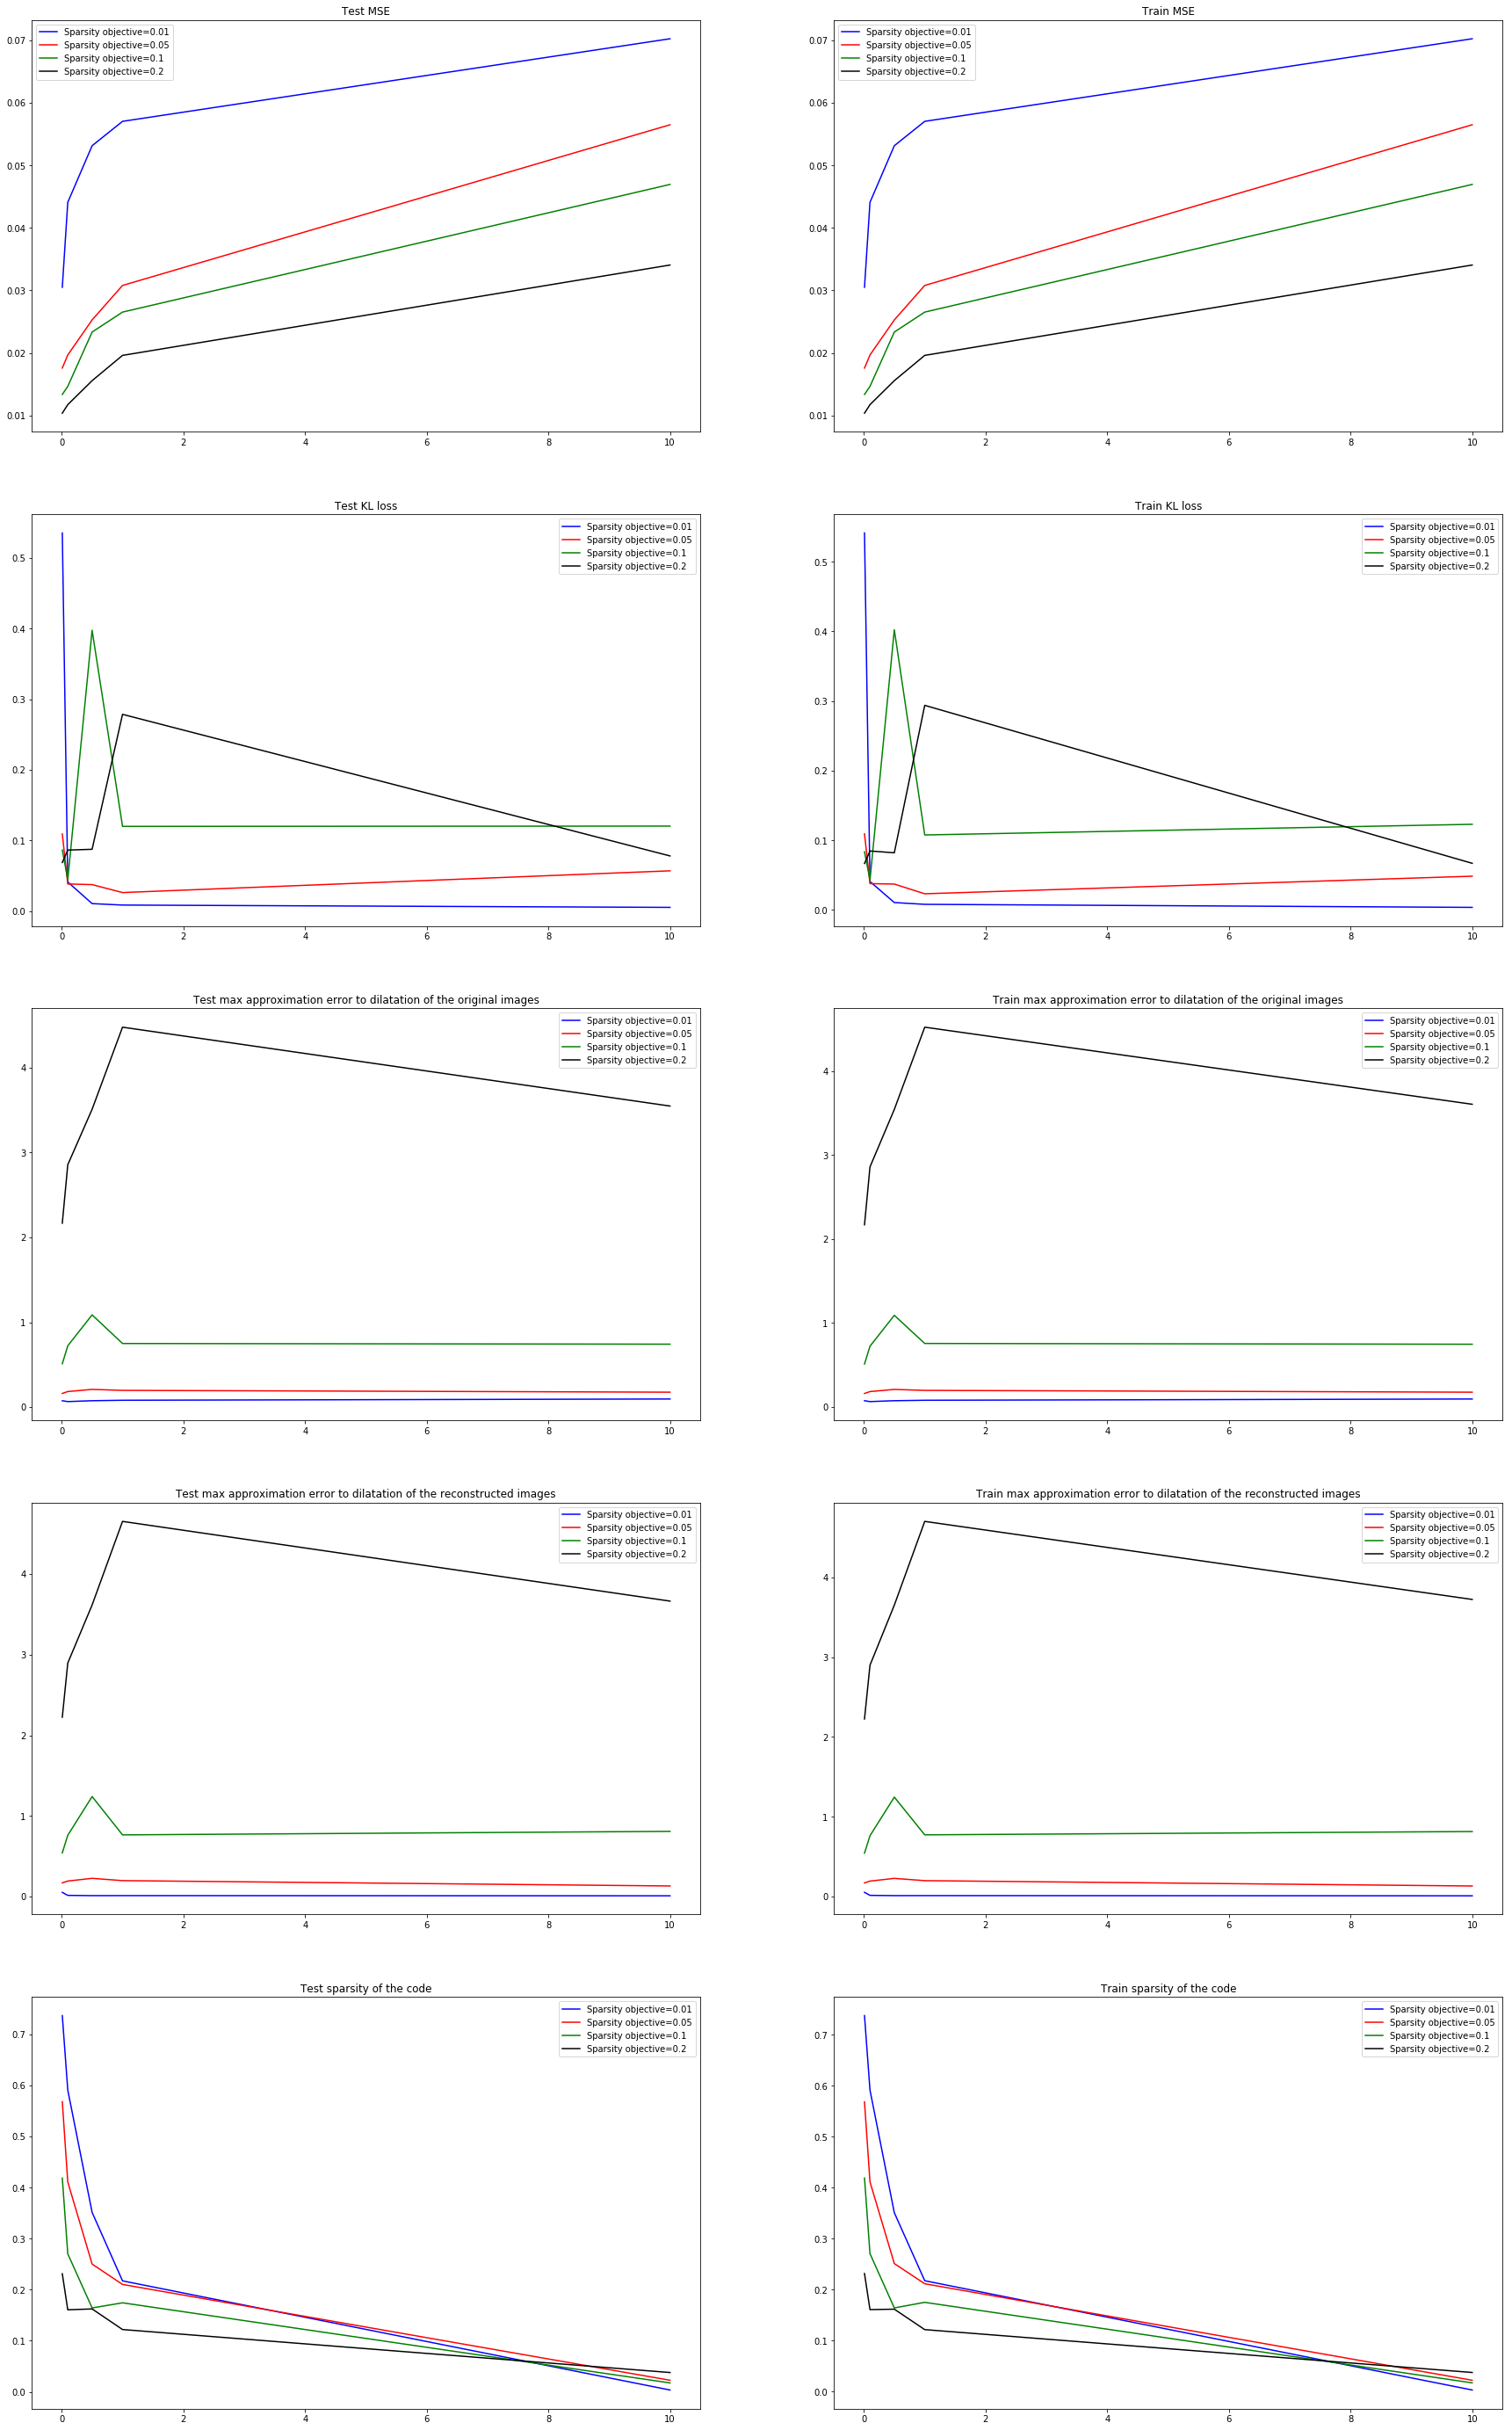

In [60]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()

# 1. Sparsity Objective: 0.01

In [9]:
sparsity_objectives[0]

0.01

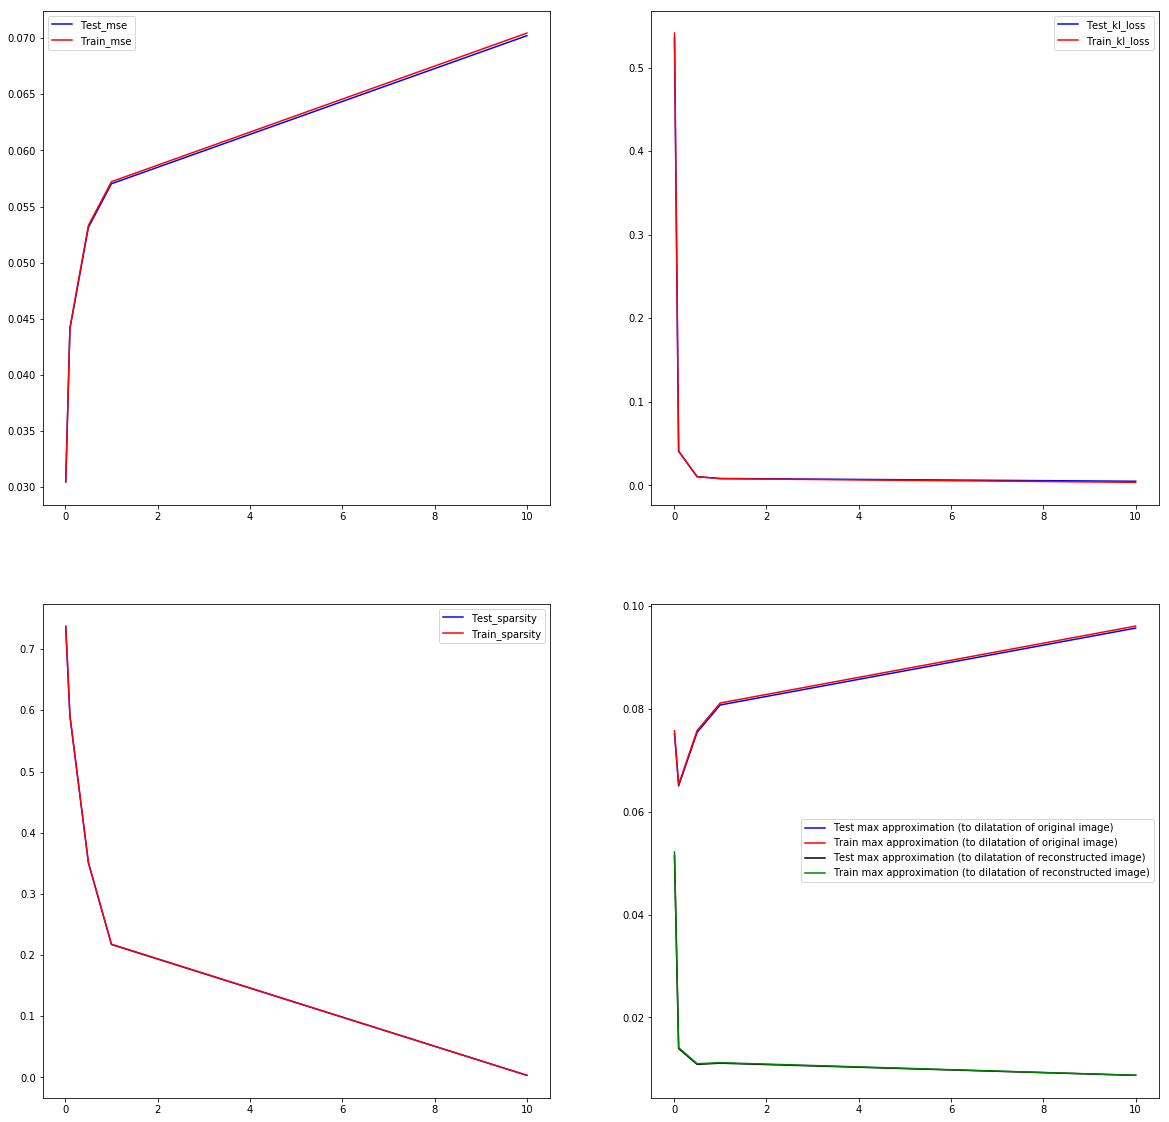

In [32]:
plt.figure(figsize=(20,20))

ax = plt.subplot(2, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,0], 'r')
ax.legend(['Test_mse', 'Train_mse'])

ax = plt.subplot(2, 2, 2)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'r')
ax.legend(['Test_kl_loss', 'Train_kl_loss'])

ax = plt.subplot(2, 2, 3)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,0], 'r')
ax.legend(['Test_sparsity', 'Train_sparsity'])

ax = plt.subplot(2, 2, 4)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'k')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'g')
ax.legend(['Test max approximation (to dilatation of original image)', 
           'Train max approximation (to dilatation of original image)',
           'Test max approximation (to dilatation of reconstructed image)',
           'Train max approximation (to dilatation of reconstructed image)'])

plt.show()

## 1.1 Sparsity weight = 0.01

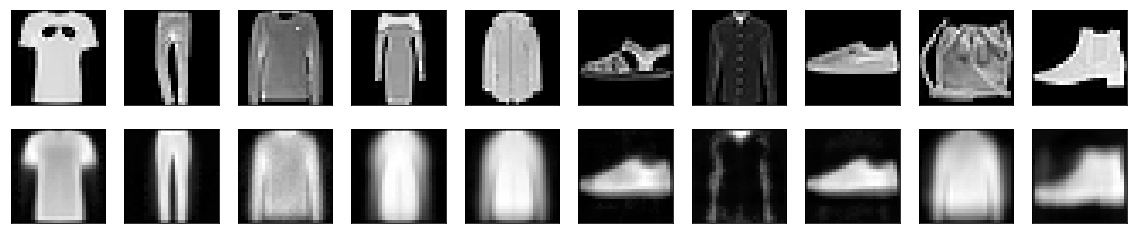

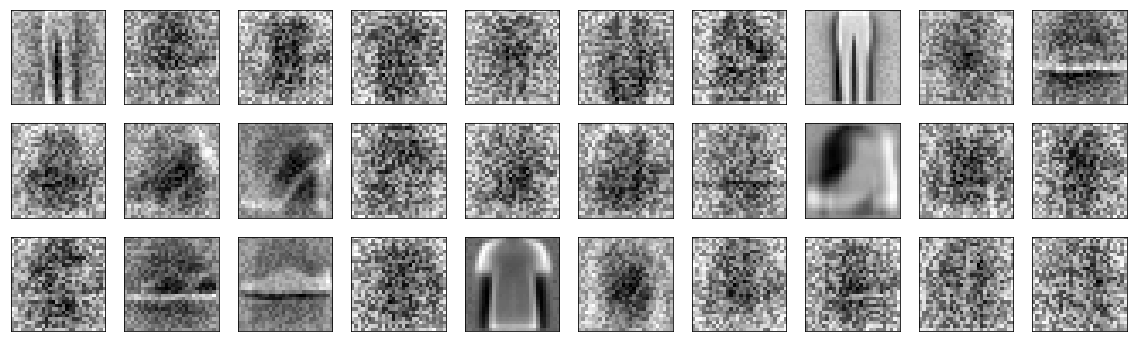

In [34]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.01_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

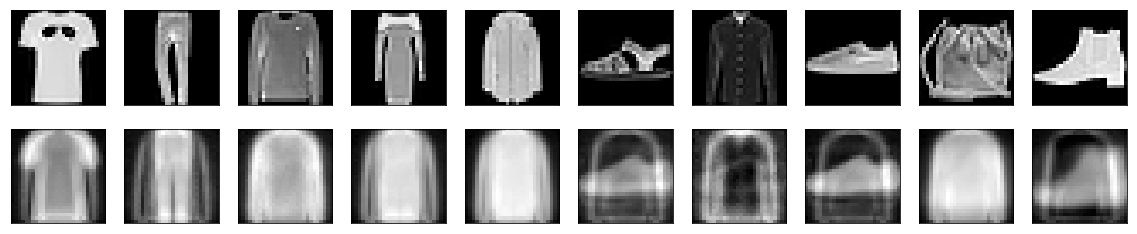

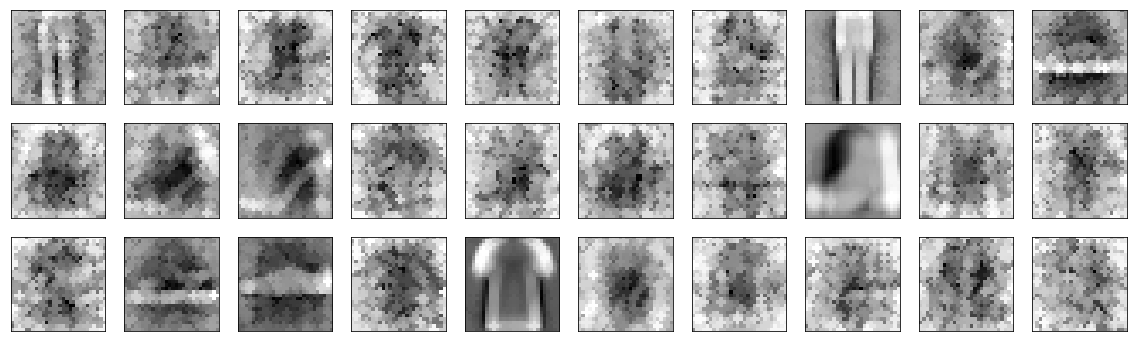

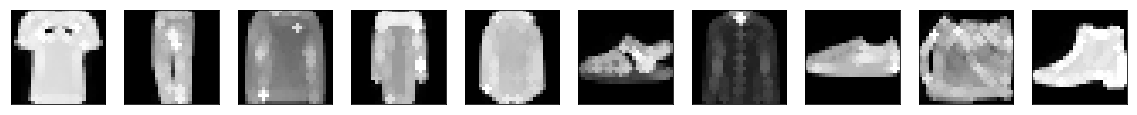

In [37]:
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))

## 1.2 Sparsity weight = 0.1

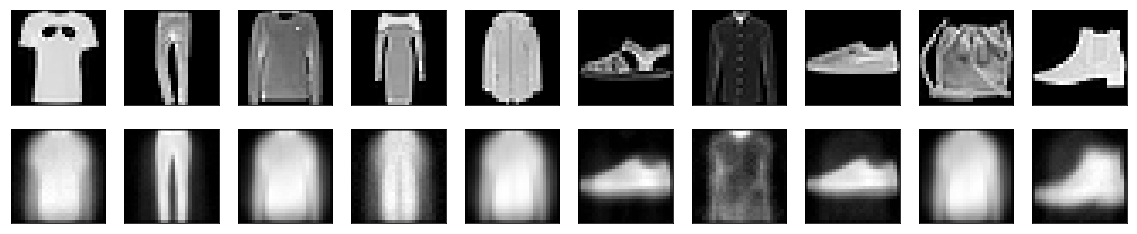

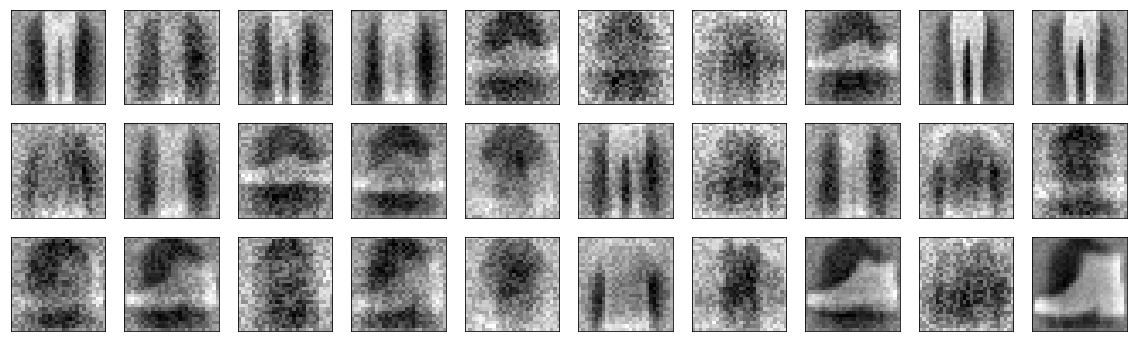

In [38]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.1_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

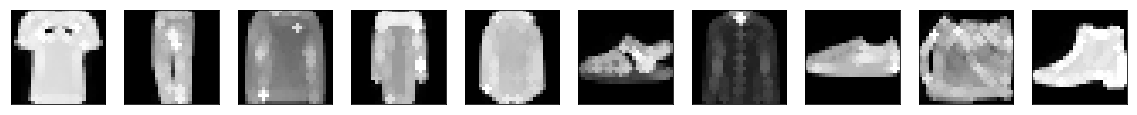

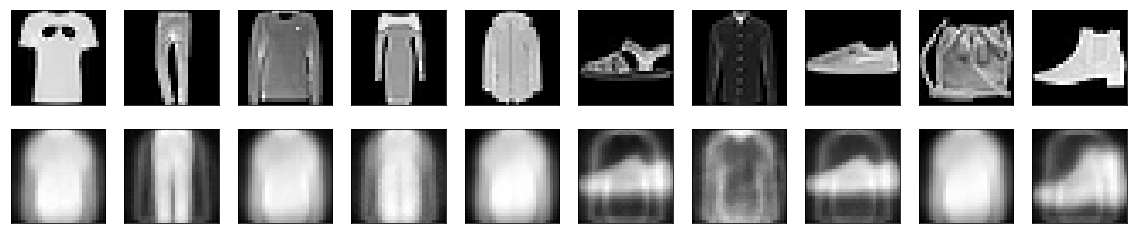

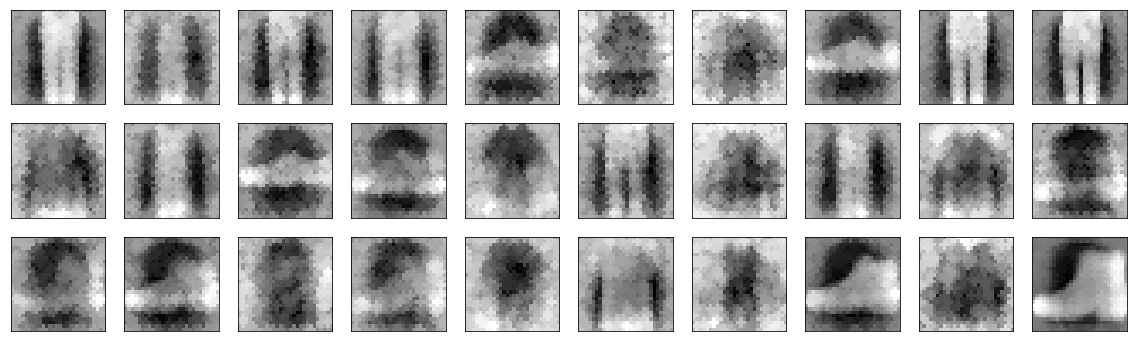

In [40]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity weight = 0.5

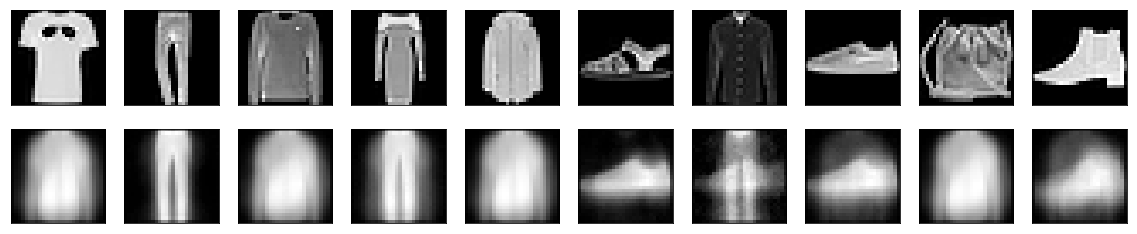

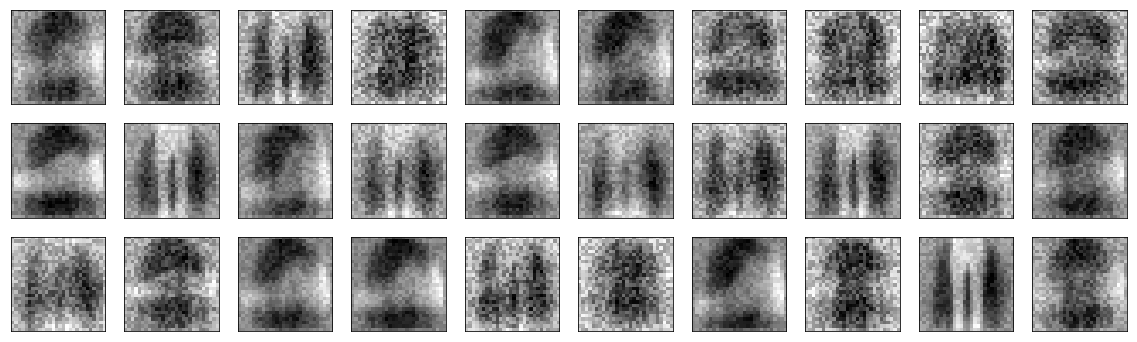

In [41]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.5_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

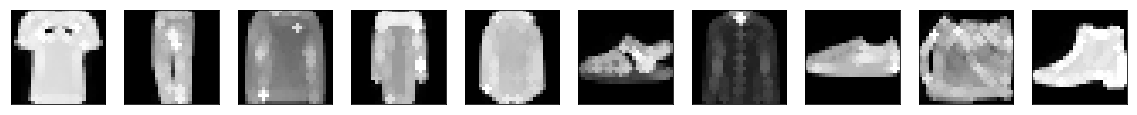

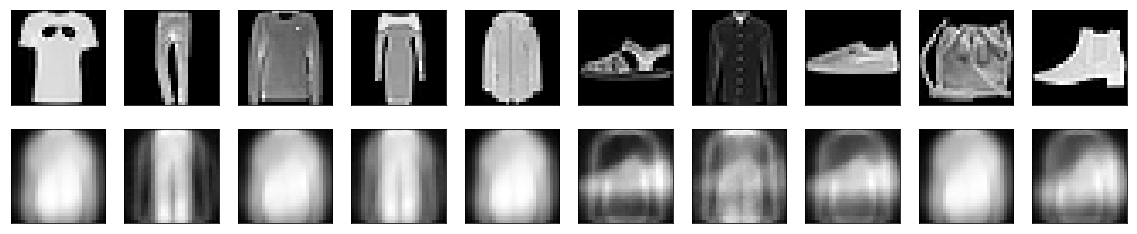

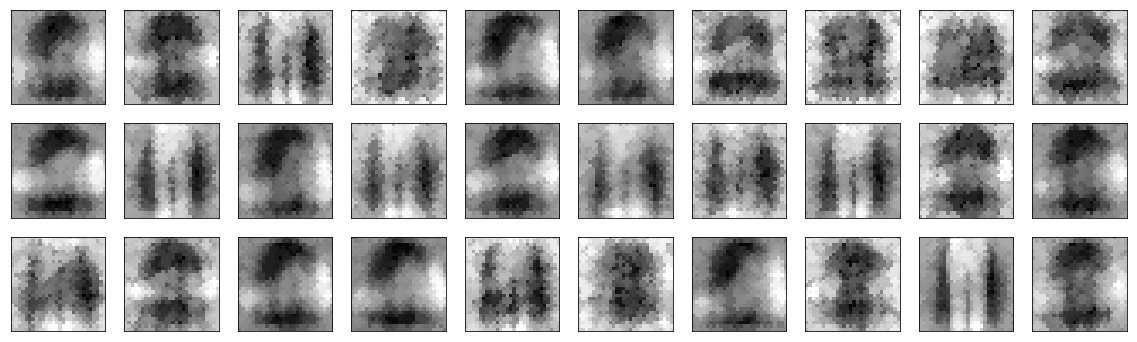

In [42]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.4 Sparsity weight = 1

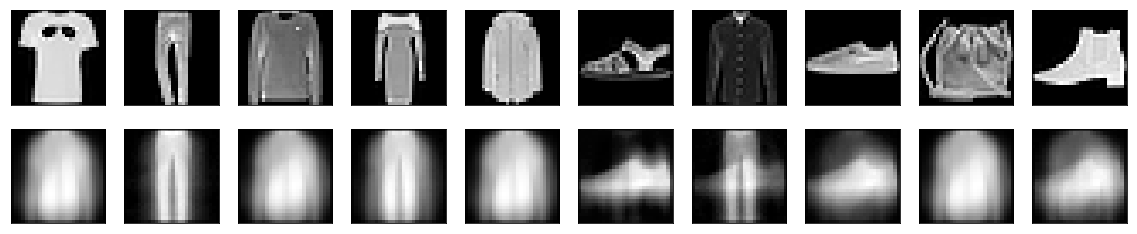

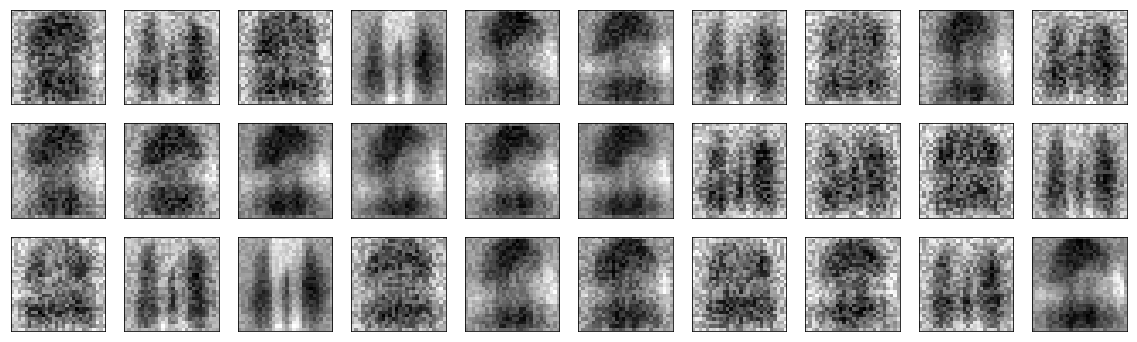

In [43]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_1_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

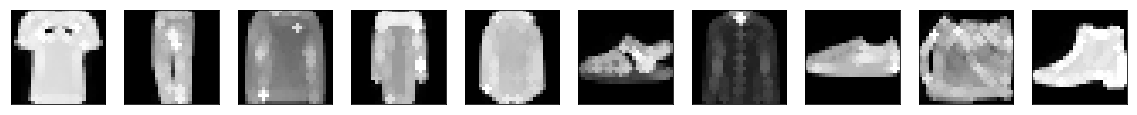

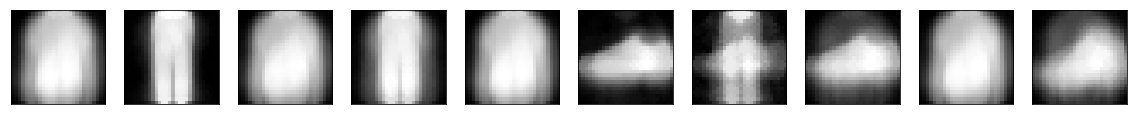

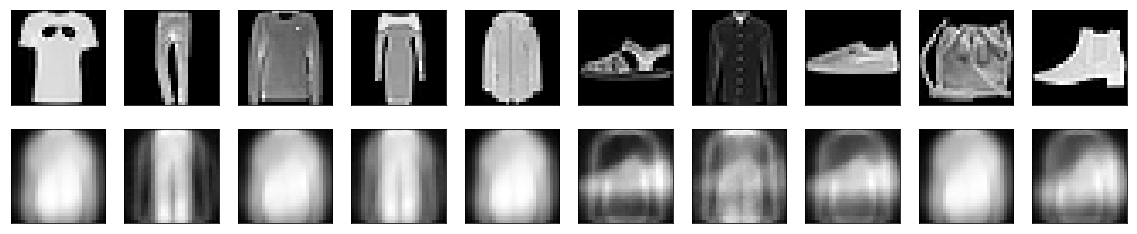

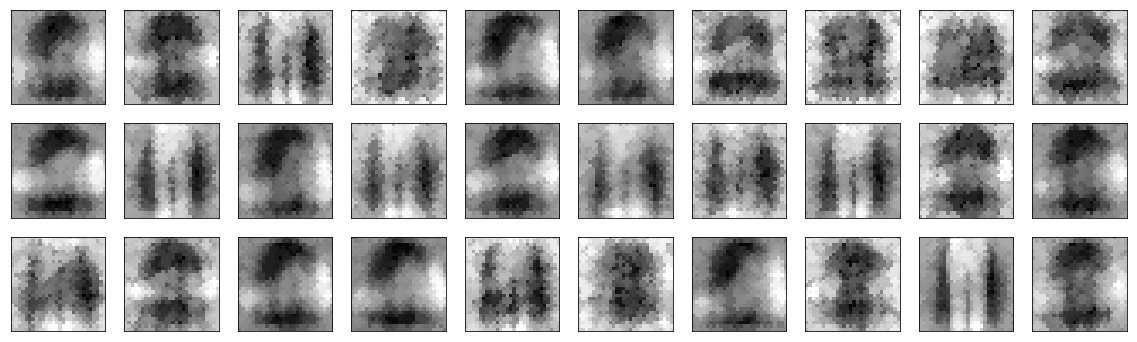

In [47]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity weight = 10

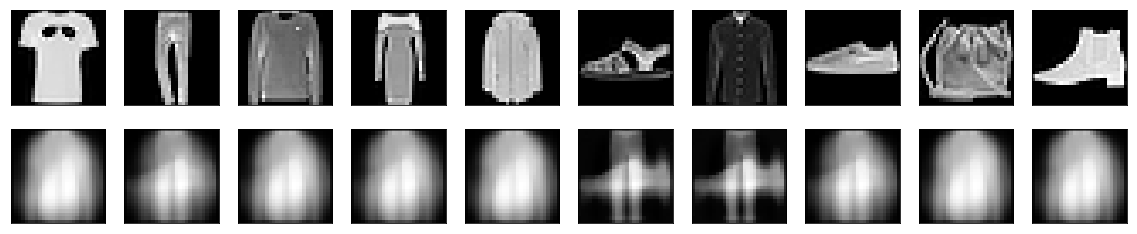

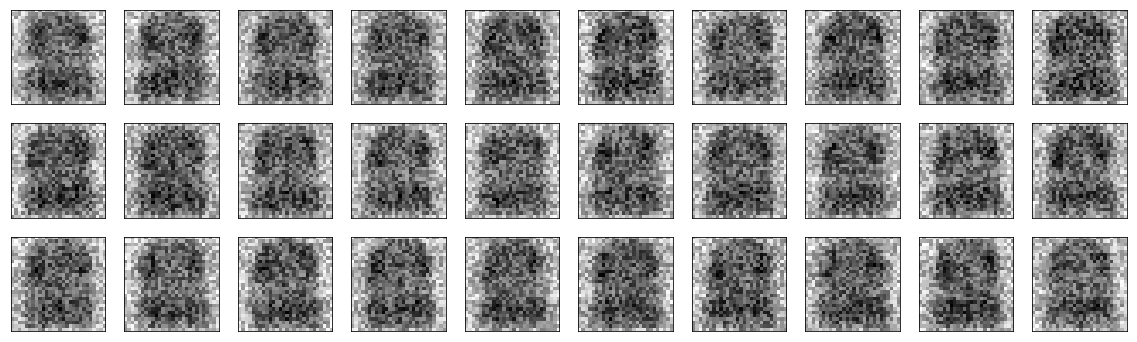

In [48]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_10_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

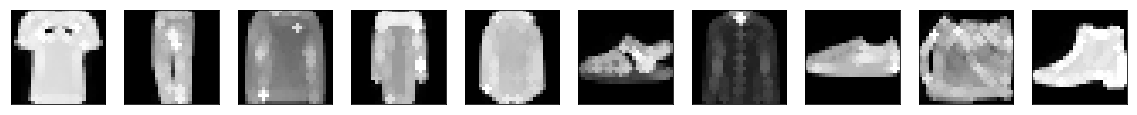

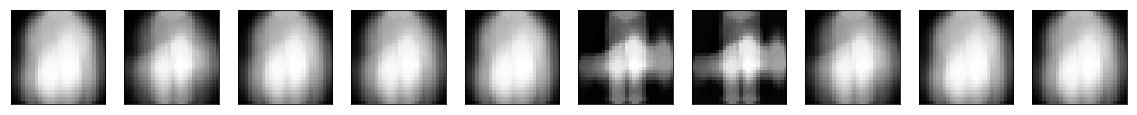

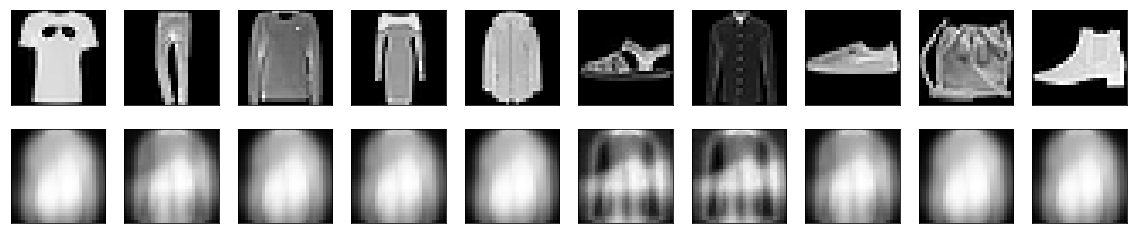

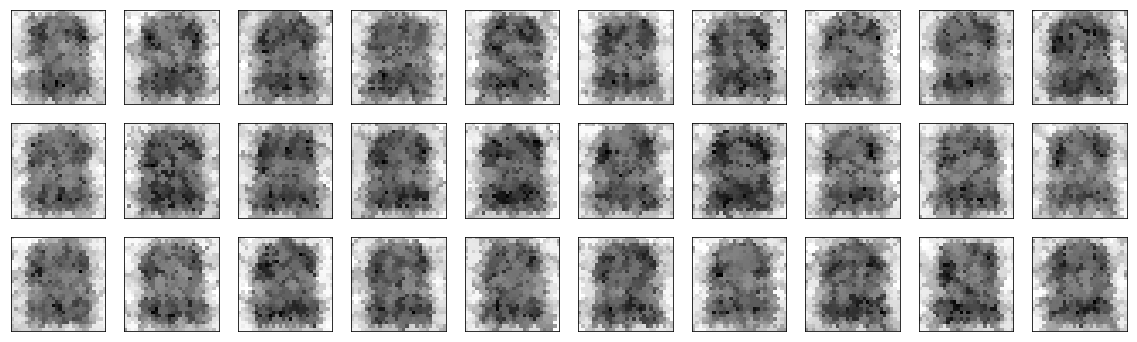

In [50]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 2. Sparsity_objective = 0.05

In [51]:
sparsity_objectives[1]

0.05

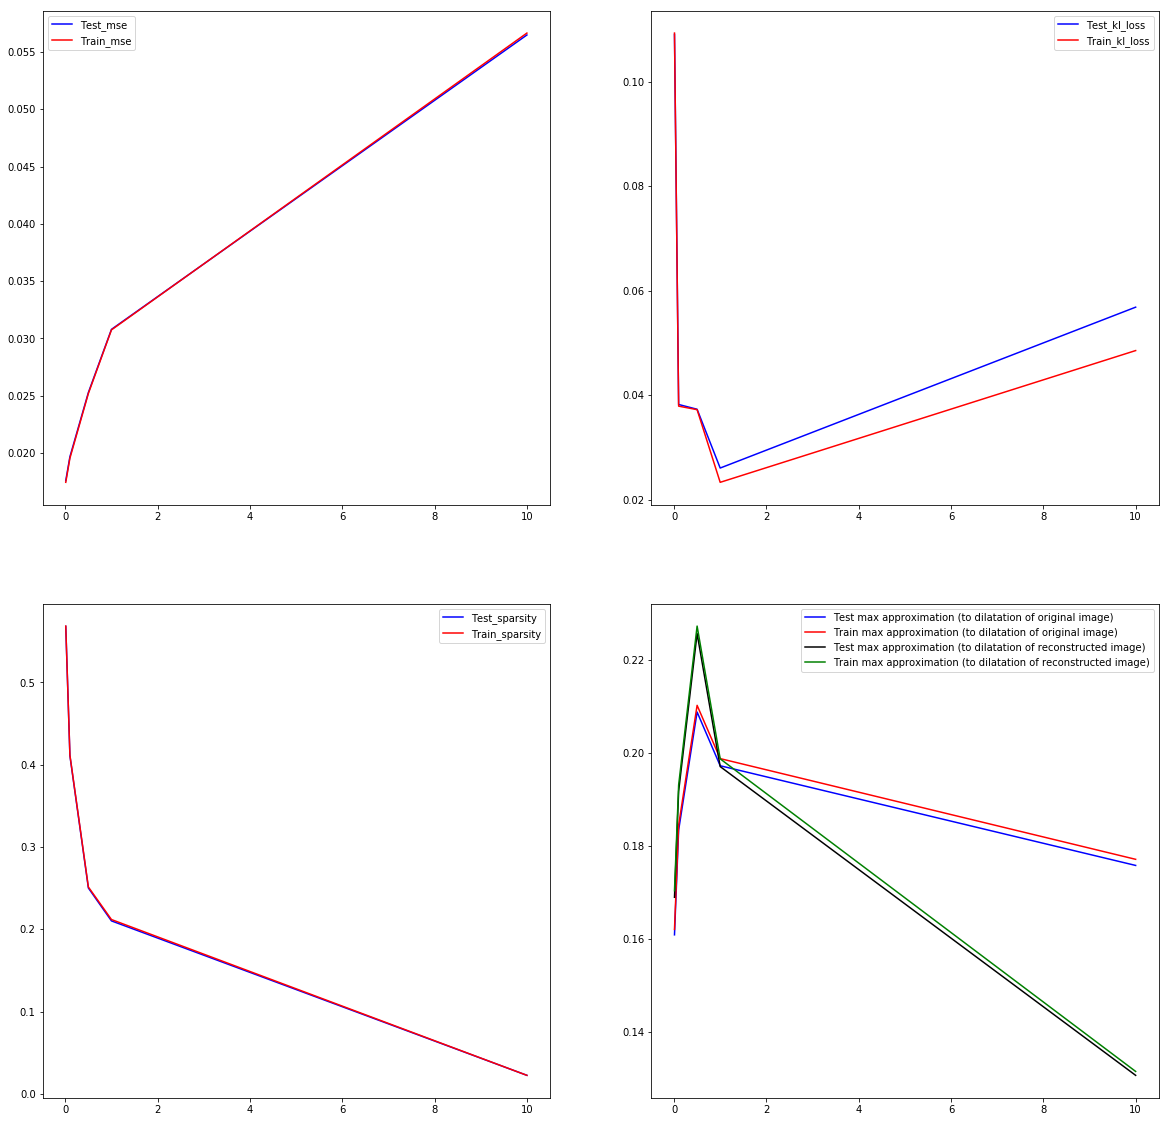

In [52]:
plt.figure(figsize=(20,20))

ax = plt.subplot(2, 2, 1)
ax.plot(sparsity_weights, test_mse[:,1], 'b')
ax.plot(sparsity_weights, train_mse[:,1], 'r')
ax.legend(['Test_mse', 'Train_mse'])

ax = plt.subplot(2, 2, 2)
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.legend(['Test_kl_loss', 'Train_kl_loss'])

ax = plt.subplot(2, 2, 3)
ax.plot(sparsity_weights, test_sparsity[:,1], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.legend(['Test_sparsity', 'Train_sparsity'])

ax = plt.subplot(2, 2, 4)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'k')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'g')
ax.legend(['Test max approximation (to dilatation of original image)', 
           'Train max approximation (to dilatation of original image)',
           'Test max approximation (to dilatation of reconstructed image)',
           'Train max approximation (to dilatation of reconstructed image)'])

plt.show()

## 1.1 Sparsity weight = 0.01

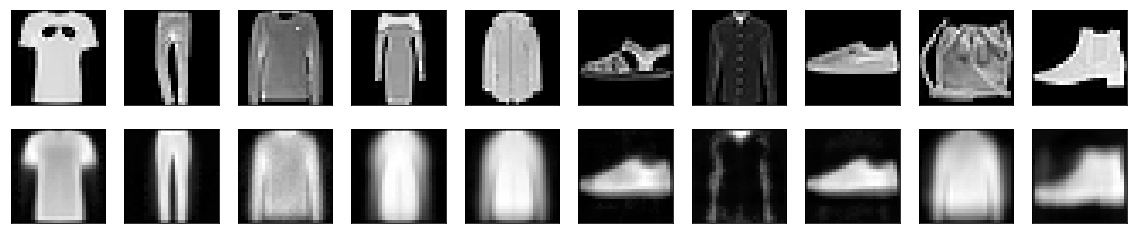

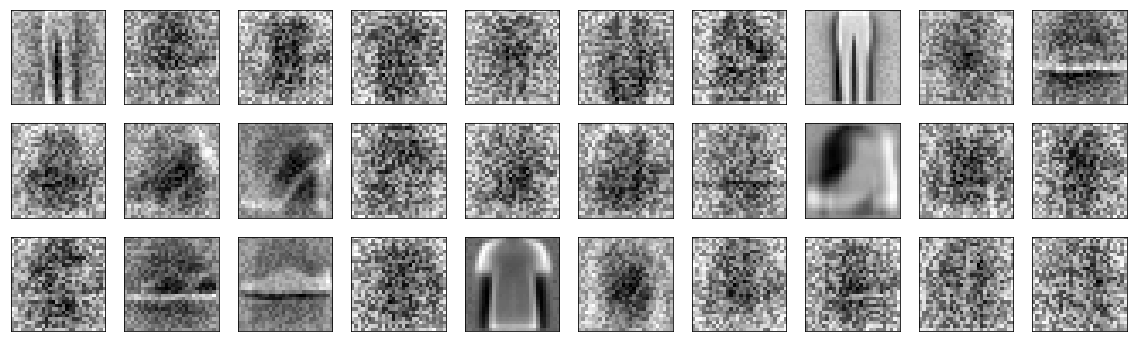

In [34]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.01_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

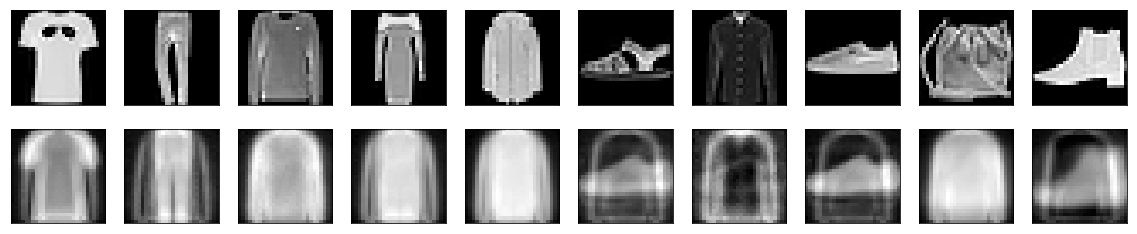

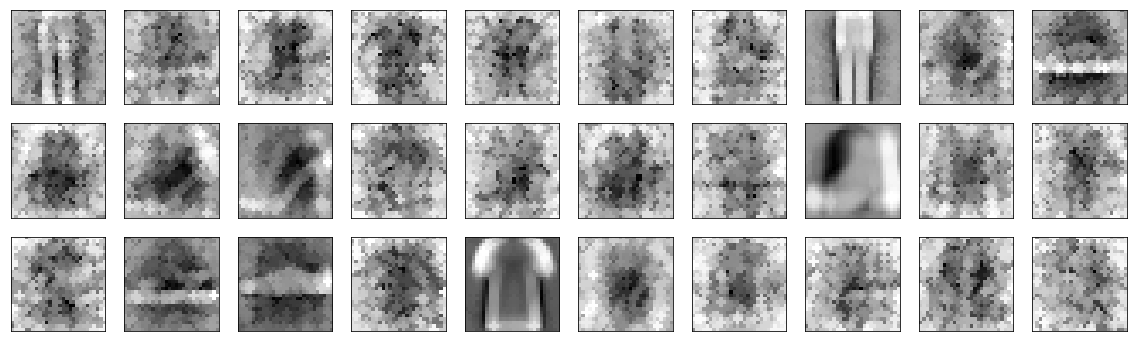

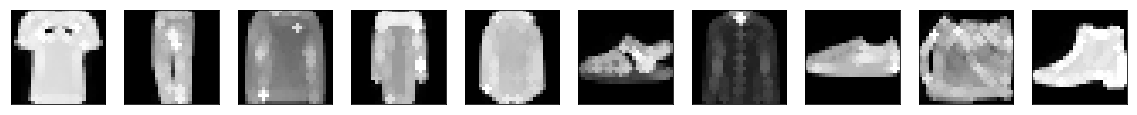

In [37]:
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))

## 1.2 Sparsity weight = 0.1

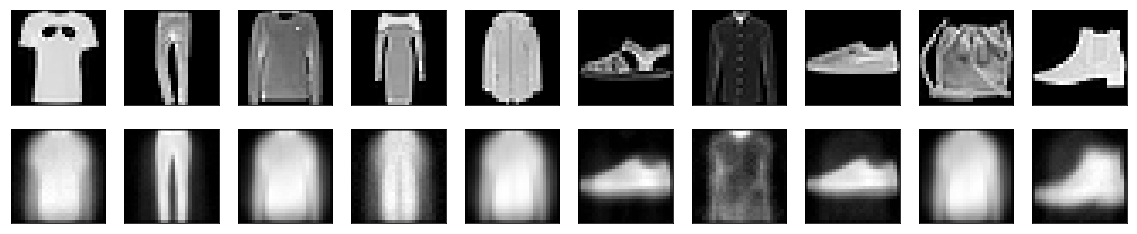

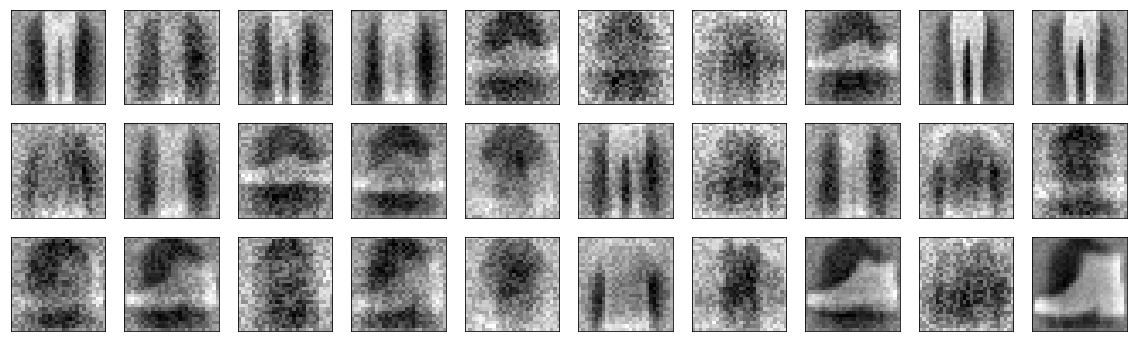

In [38]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.1_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

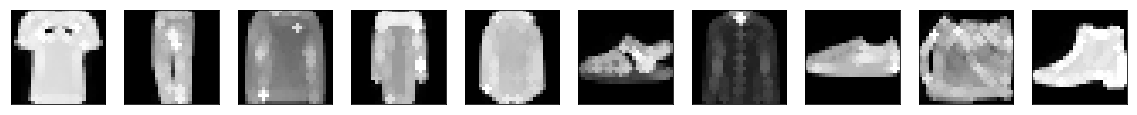

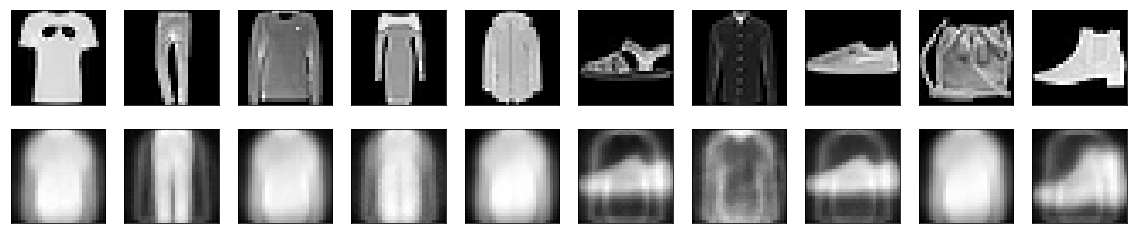

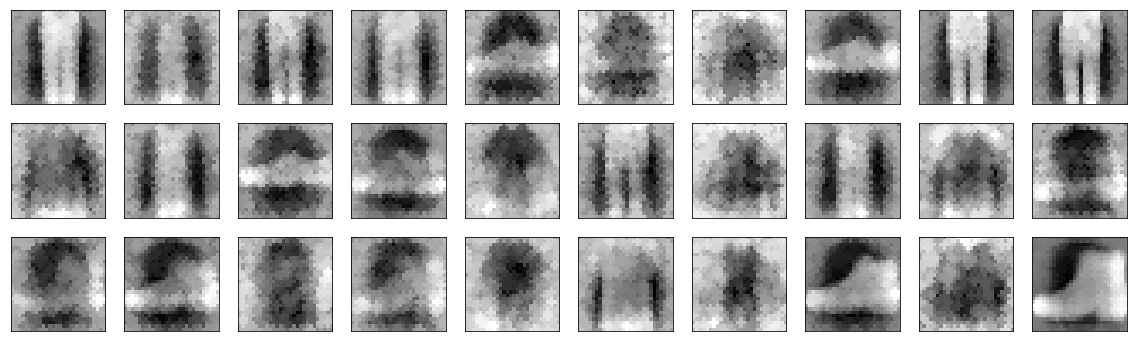

In [40]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity weight = 0.5

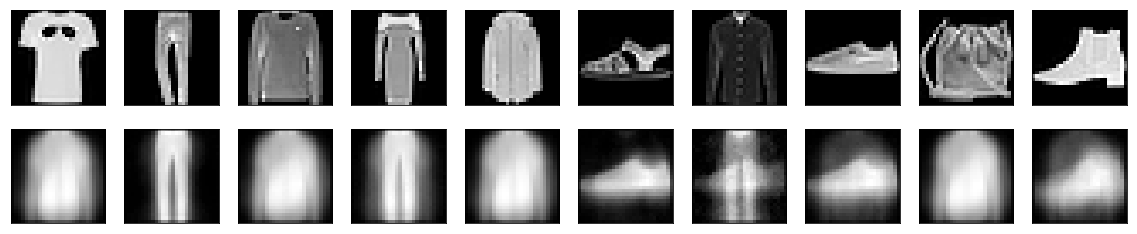

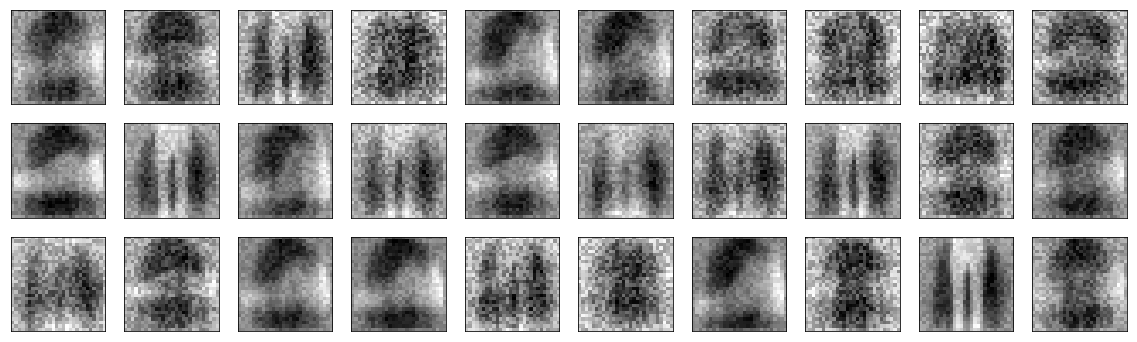

In [41]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.5_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

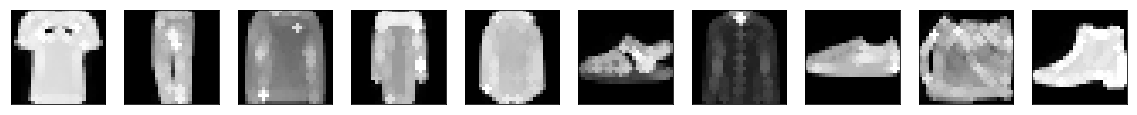

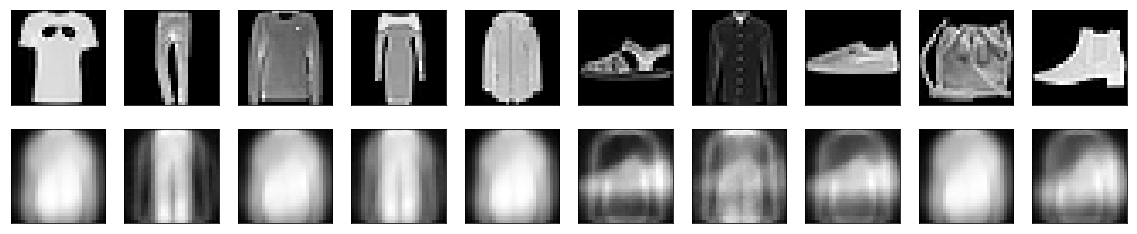

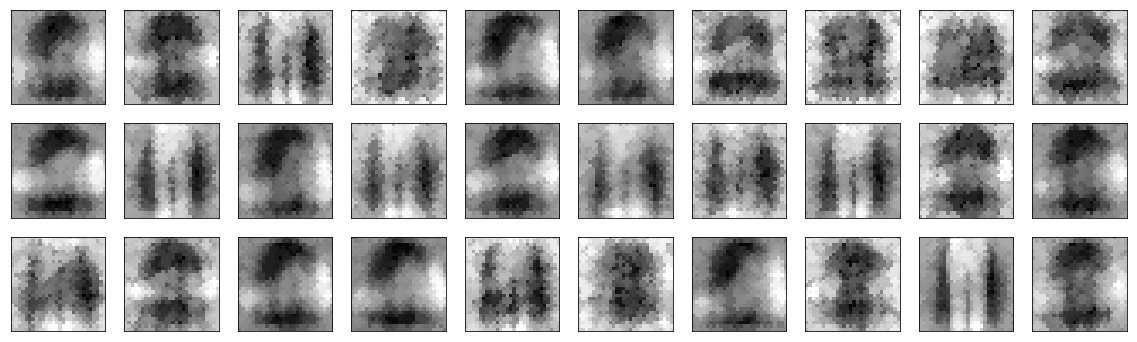

In [42]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.4 Sparsity weight = 1

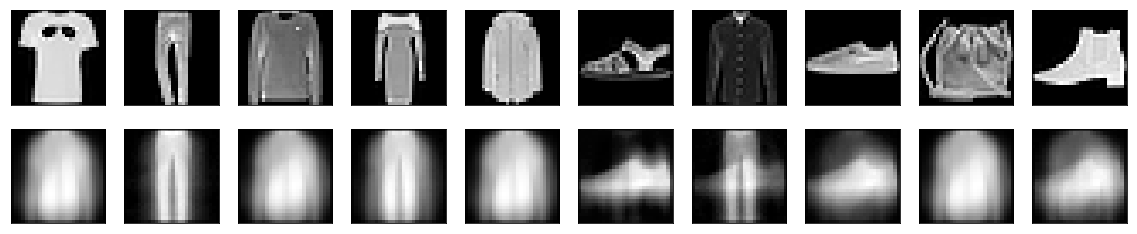

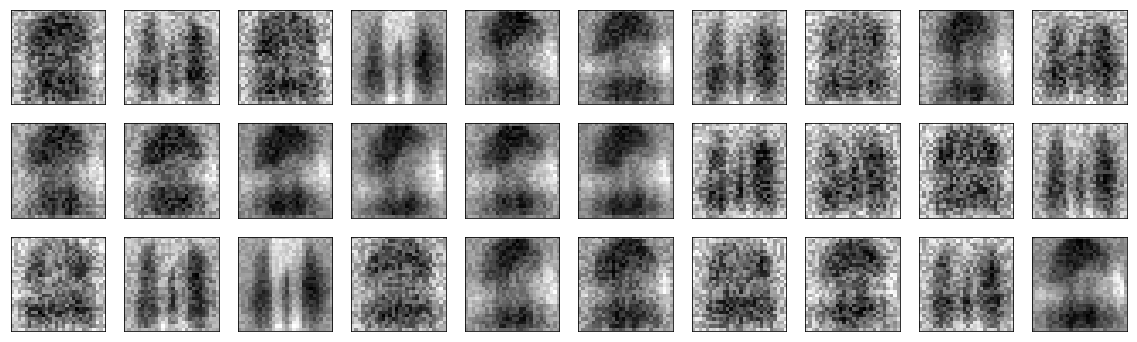

In [43]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_1_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

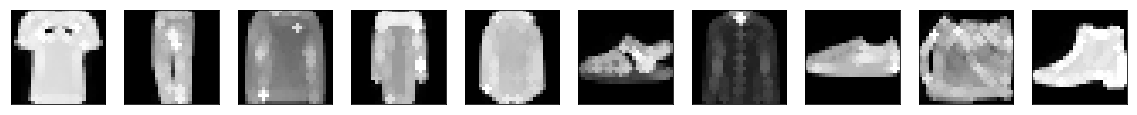

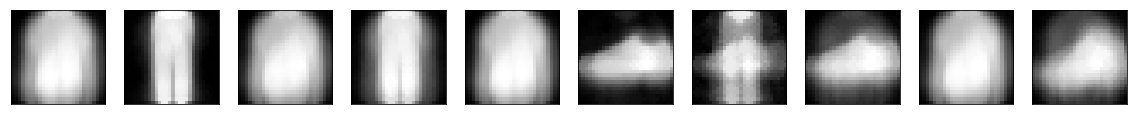

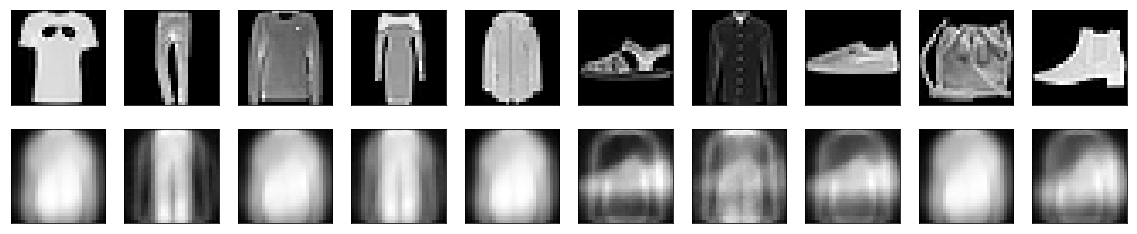

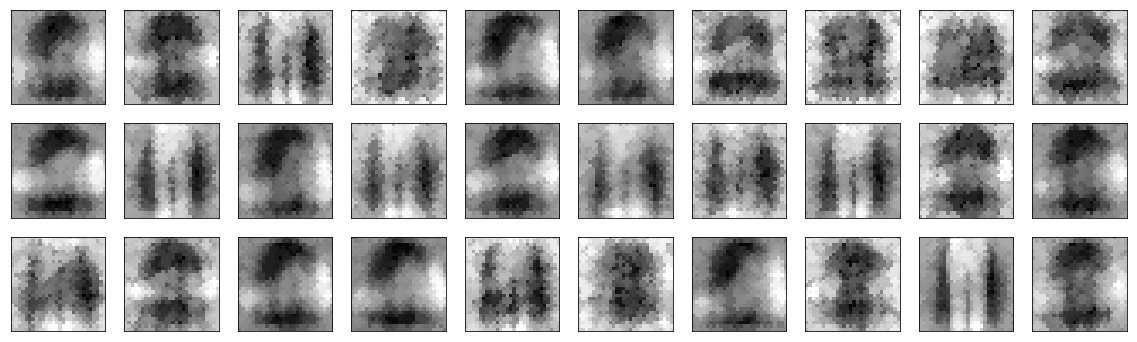

In [47]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity weight = 10

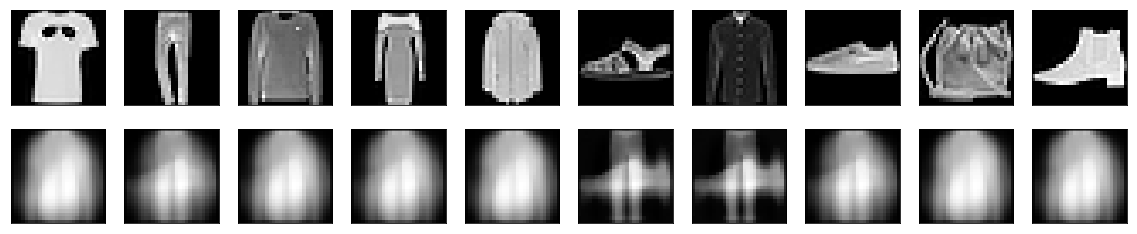

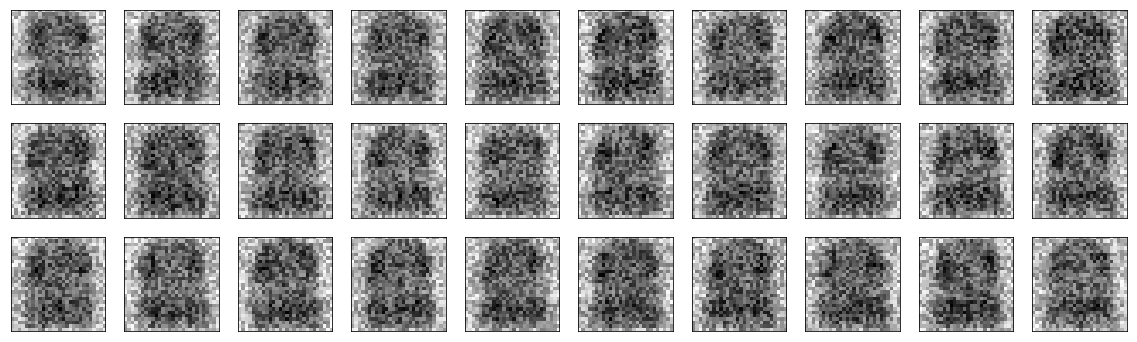

In [48]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_10_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

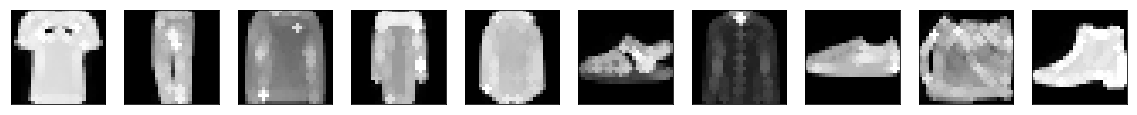

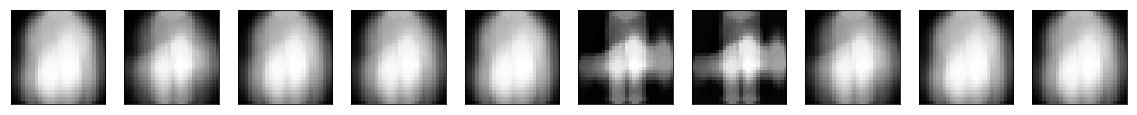

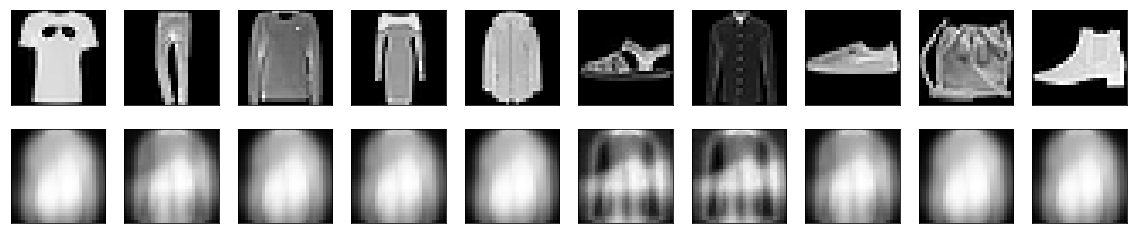

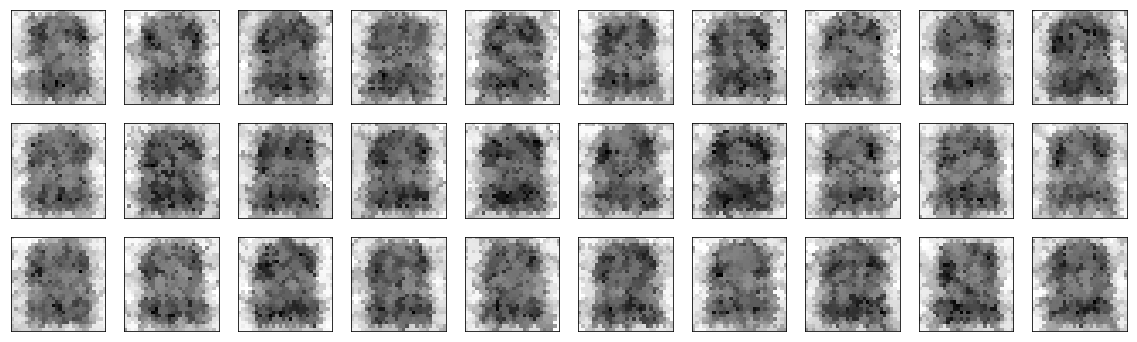

In [50]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

In [25]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.01_0.2.h5')

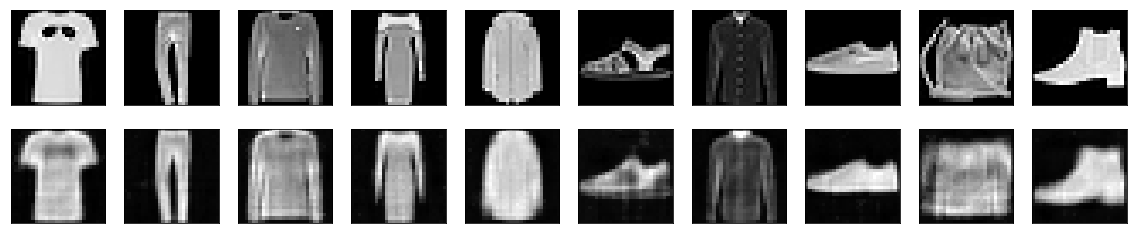

In [26]:
AE.plot_reconstructions(x_small)